# PA005: High Value Customer Indentification ( Insiders )

## Planejamento da Solução ( IOT )

### Input - Entrada

1. ***Problema de Negócio***
  - Selecionar os clientes mais valiosos para integrar um programa de Fidelização
   
2. ***Conjunto de Dados***
  - Vendas de um e-commerce online, durane o período de um ano.


### Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders


  - Lista: 
  
              client_id | is_insider  |
                104224  |   yes/1   
                332131  |   no/0


2. Relatório com as respostas das perguntas de negócio

- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?


### Tasks - Tarefas

##### ***1. Quem são as pessoas elegíveis para participar do programa de Insiders ?***
- ***O que é ser elegível? O que são clientes de maior "valor"?***

- ***Faturamento:***

        - Alto Ticket Médio.
        - Alto LTV (Live Time Value).
        - Baixa Recência.
        - Alto Basket Size.
        - Baixa Probabilidade de Churn.
        - Previsão de LTV.
        - Alta propensão de compra.
- ***Custo:***

        - Baixo custo de devolução

- ***Experiência de compra:***

        - Média alta das avaliações
        

    
##### ***2. Quantos clientes farão parte do grupo?***


        - Número total de clientes
        - % do grupo de Insiders

##### ***3. Quais as principais características desses clientes ?***
- ***Escrever características do cliente:***

        - Idade
        - Localização
- ***Escrever características do consumo:***

        - Atributos de clusterização
        

##### ***4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?***

- ***Faturamento total do ano***

- ***Faturamento do grupo Insiders***


##### 5. ***Qual a expectativa de faturamento desse grupo para os próximos meses ?***

- ***LTV do grupo Insiders***

- ***Análise de Cohort*** 

##### 6. ***Quais as condições para uma pessoa ser elegível ao Insiders ?***

- ***Definir periodicidade ( 1 mês, 3 meses )***

- ***A pessoa precisa ser similar ou parecido com uma pessoa do grupo***

##### 7. ***Quais as condições para uma pessoa ser removida do Insiders ?***

- ***Definir periodicidade ( 1 mês, 3 meses )***

- ***A pessoa precisa ser dissimilar ou não parecida com uma pessoa do grupo***

##### 8. ***Qual a garantia que o programa Insiders é melhor que o restante da base ?***

- ***Teste A/B***

- ***Teste de Hipóteses***

##### 9. ***Quais ações o time de marketing pode realizar para aumentar o faturamento?***

- ***Desconto***
- ***Preferência de Compra***
- ***Frente***
- ***Visita***


## 0.0. Imports

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import cluster as c
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics as m
from plotly import express as px

### 0.1. Helper Functions

In [42]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'ggplot' )
    plt.rcParams[ 'figure.figsize' ] = [24, 9]
    plt.rcParams[ 'font.size' ] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

jupyter_settings() 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 0.2. Load Dataset

In [43]:
# load data
df_raw = pd.read_csv('/Users/thiago/Thiago/Data_Science/comunidade_ds/insiders_clustering/data/raw/ecommerce.csv', encoding='unicode_escape' )

# drop extra column
df_raw = df_raw.drop( columns=['Unnamed: 8'], axis=1 )

In [44]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## <font color='red'> 1.0. Descrição dos Dados </font>

In [45]:
df1 = df_raw.copy()

### 1.1. Rename Columns

In [46]:
cols_new = [ 'invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country' ]
df1.columns = cols_new

### 1.2. Data Dimensions

In [47]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of rows: 541909
Number of cols: 8


### 1.3. Data Types

In [48]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

### 1.4. Check NA

In [49]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### 1.5. Replace NA

In [50]:
# remove NA
df1 = df1.dropna( subset=['description', 'customer_id'] )
print( 'Removed Data: {:.2f}'.format( 1 - ( df1.shape[0] / df_raw.shape[0] ) ) )

Removed Data: 0.25


In [51]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

### 1.6. Change Types

In [52]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [53]:
# invoice_date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y' )

# customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

### 1.7. Descriptive Statistics

## <font color='red'> 2.0. Feature Engineering </font>

In [54]:
df2 = df1.copy()

### 2.1. Feature Creation

In [55]:
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [56]:
# data reference

df_ref = df2.drop( ['invoice_no', 'stock_code', 'description', 'quantity',
                    'invoice_date', 'unit_price', 'country'],
                     axis=1 ).drop_duplicates( ignore_index=True)

df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [58]:
# Gross Renevue ( Faturamento - quantity * price)
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

# Recency - Last Day Purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )


In [59]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


## <font color='red'> 3.0. Filtragem das Variáveis </font>

In [60]:
df3 = df_ref.copy()

## <font color='red'> 4.0. EDA ( Exploratory Data Analysis )</font>

In [61]:
df4 = df3.copy()

## <font color='red'> 5.0. Data Preparation</font>

In [62]:
df5 = df4.copy()

## <font color='red'> 6.0. Feature Selection</font>

In [63]:
df6 = df5.copy()

## <font color='red'> 7.0. Hyperparameter Fine-Tunning </font>

In [64]:
X = df6.drop( columns=['customer_id'] )

In [65]:
clusters = [2, 3, 4, 5, 6]

### 7.1. Within-Cluster Sum of Square ( WSS )

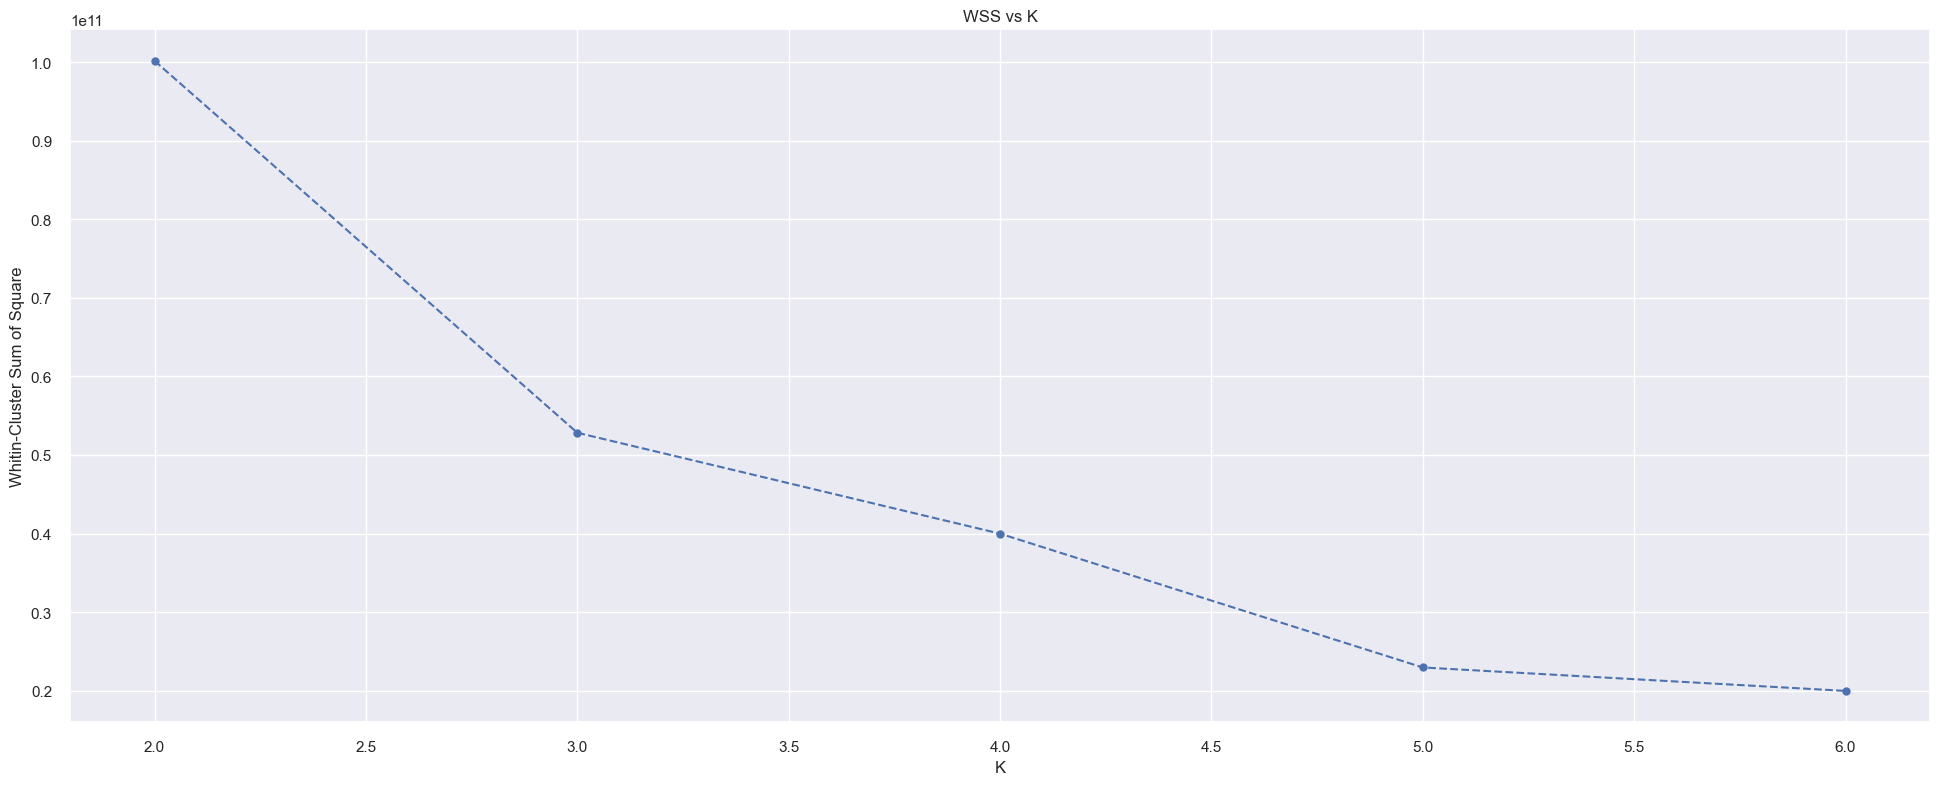

In [66]:
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

    # model training
    kmeans.fit( X )

    # validation
    wss.append( kmeans.inertia_ )

# plot wss - Elbow Method
plt.plot( clusters, wss, linestyle='--', marker='o', color='b' );
plt.xlabel( 'K' );
plt.ylabel( 'Whitin-Cluster Sum of Square' );
plt.title( 'WSS vs K');

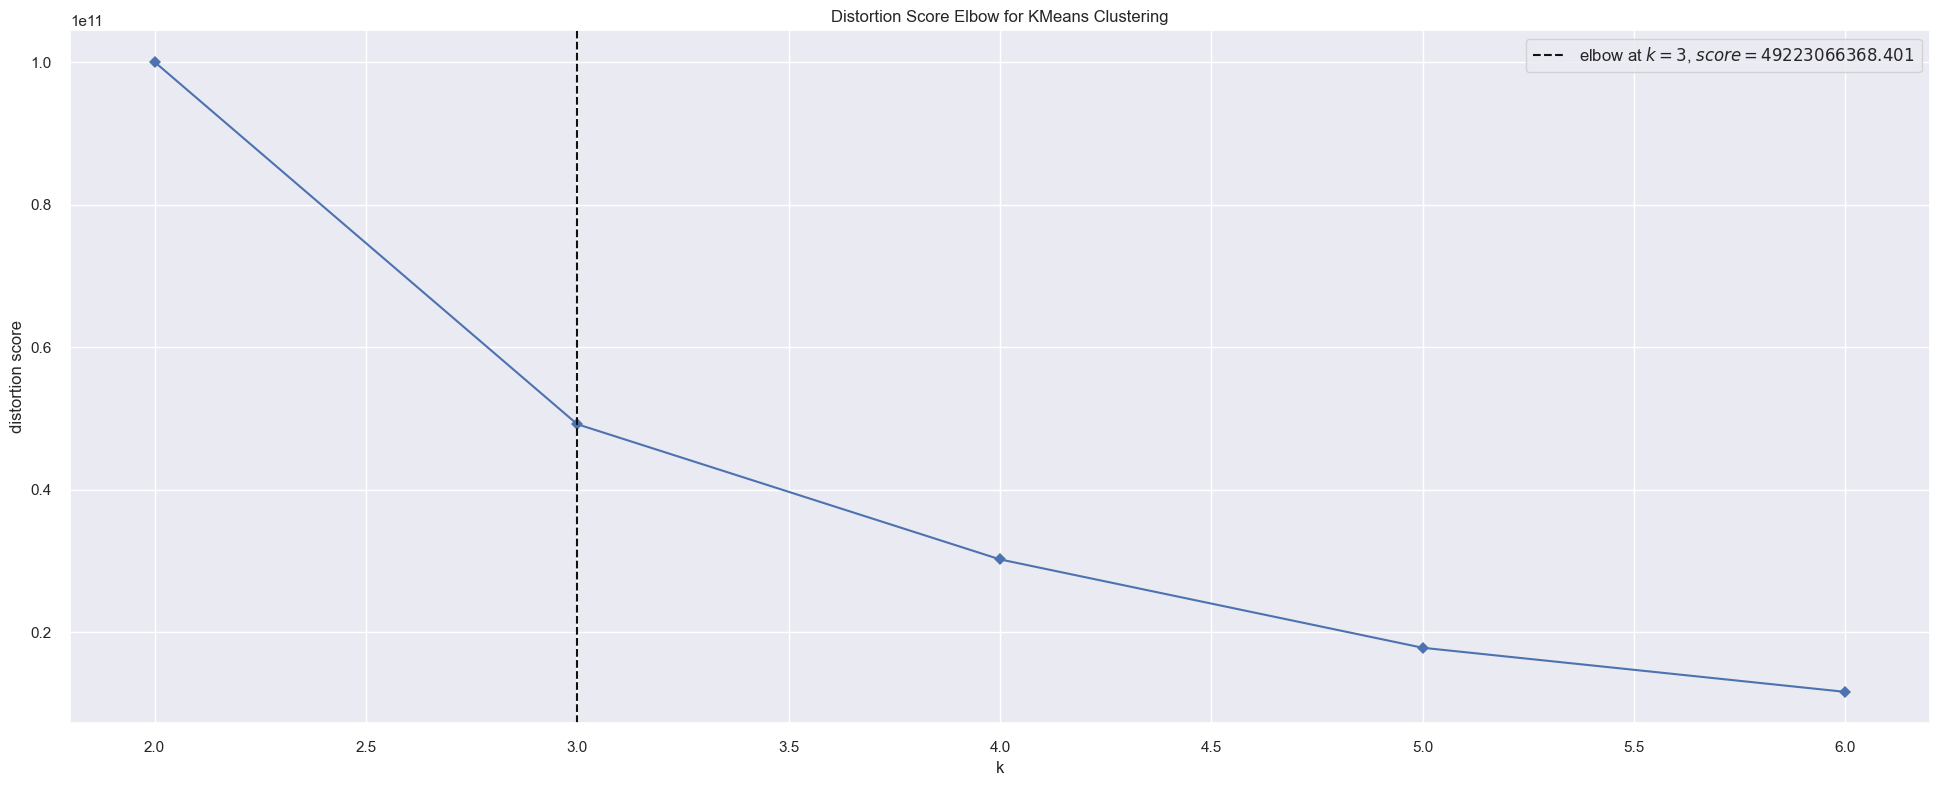

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()

### 7.2. Silhouette Score

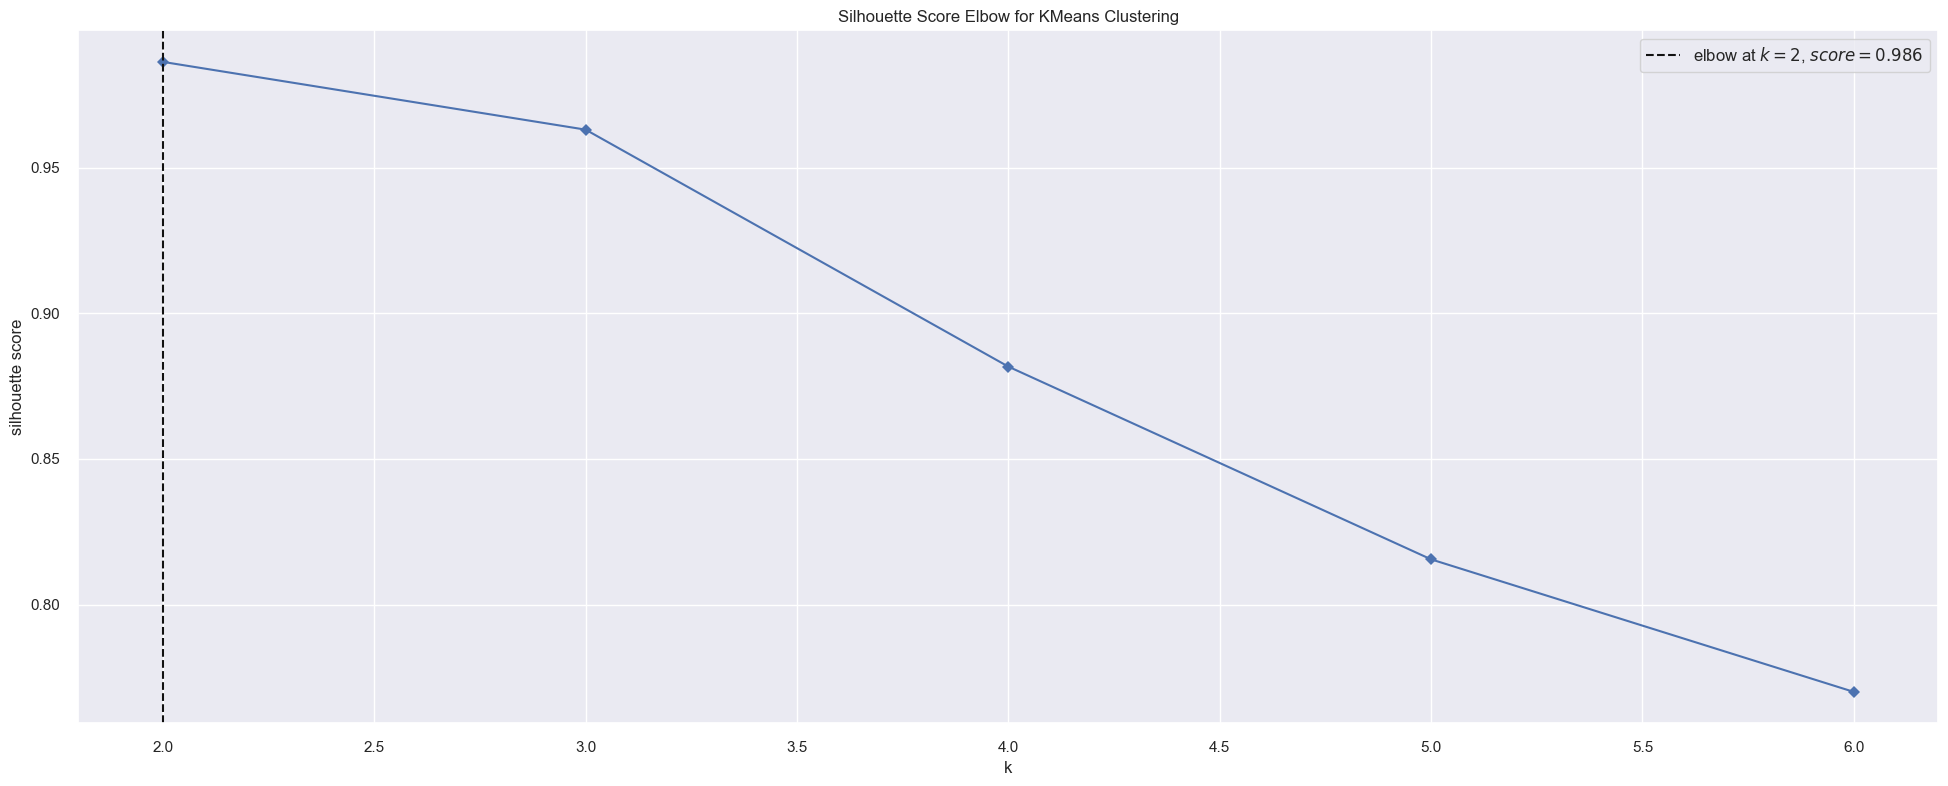

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [68]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette',  timings=False )
kmeans.fit( X )
kmeans.show()

## <font color='red'> 8.0. Model Training </font>

### 8.1. K-Means

In [69]:
# model definition
k = 3
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_


### 8.2. Cluster Validation

In [70]:
## WSS ( Within-Cluster Sum of Square )
print( 'WSS Value: {}'.format( kmeans.inertia_ ) )

## SS ( Silhouette Score )
print ( 'SS value: {}'.format( m.silhouette_score( X, labels, metric='euclidean' ) ) )

WSS Value: 52830442008.00694
SS value: 0.9494677566681542


## <font color='red'> 9.0. Cluster Analysis </font>

In [71]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,0
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,0
4,15100,635.10,330,6,0


### 9.1. Visualization Inspection

In [73]:
fig = px.scatter_3d( df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster' )
fig.show()

### 9.2. Cluster Profile

In [74]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,0
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,0
4,15100,635.10,330,6,0


In [75]:
# Number of Customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_cluster'] = 100 * ( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Average Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()

df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Average Recency Days

# Average Invoice_no

df_cluster

,cluster,customer_id,perc_cluster,gross_revenue
0,0,4335,99.153705,1372.577826
1,1,6,0.137237,182181.981667
2,2,31,0.709058,40543.517742


## <font color='red'> 10.0 Deploy To Production </font>